# Jim's snippets regarding `scipy.signal`

The `scipy.signal` module in **SciPy** is widely used for signal processing tasks. Beyond cubic spline interpolation (e.g., `cspline`), some of its most common applications include:
1. **Filtering**
- **Design filters**: Create various filters such as FIR, IIR, Butterworth, Chebyshev, and Bessel filters.
    - Example: `butter()`, `cheby1()`, `bessel()`

- **Apply filters**: Filter signals using functions like `lfilter()` and `filtfilt()` for 1-D filtering.
    - `filtfilt()` is particularly used for zero phase filtering.

2. **Convolution and Correlation**
- Compute convolution and correlate signals using `convolve()`, `correlate()`, and `fftconvolve()` for signal processing tasks.
- Cross-correlation is useful in template matching and signal similarity analysis.

3. **Spectral Analysis**
- Work with power spectral density and spectrograms.
- Use **periodograms** and Welch's method (`periodogram()`, `welch()`) for frequency domain analysis.

4. **Processing Spectral Filters**
- Process and design digital and analog filter banks.
- Use functions like `freqz()` and `sosfreqz()` to analyze a filter’s frequency response.

5. **Finding Peaks**
- Locate peaks in signals with `find_peaks()` and related utilities. Useful in ECG analysis, stock price data peaks, etc.
- Automate and fine-tune peak detection parameters (e.g., prominence, threshold, and width).

6. **Wavelets and Transforms**
- Waveform transformations such as Continuous Wavelet Transforms (CWT) for signal compression or feature extraction.
- This is particularly useful in ECG or EEG signal processing.

7. **Impulse Response Analysis**
- Compute the impulse response of systems, focused on control systems and linear time-invariant (LTI) systems.
- Use `impulse()` or `dlti.impulse()` for LTI system analysis.

8. **Resampling**
- Resample signal data at different rates with interpolation using `resample()` or `resample_poly()`.
- Polyphase filtering is often used for efficient interpolation.

9. **Window Functions**
- Use window functions like `hamming()`, `hann()`, `blackman()` for smoothing in the frequency domain.
- Apply these windows in FFT analysis or spectral computations.

10. **Z-Transform and System Analysis**
- Polynomials and Z-transform for defining system behavior.
- Functions like `tf2zpk()` convert transfer functions into zero-pole representation.

11. **Continuous and Discrete Systems**
- Design and analyze discrete and continuous transfer functions, including state-space representations.


## Filtering signals

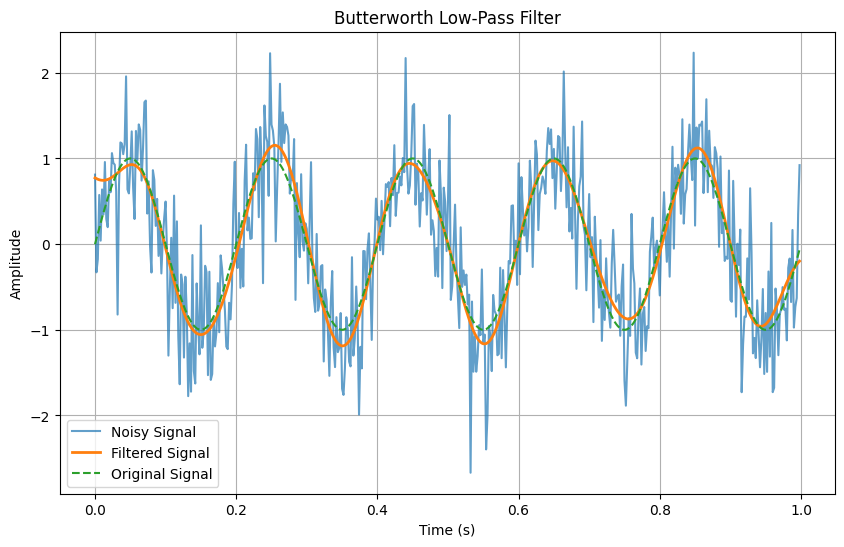

In [1]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Generate a noisy sine wave signal
fs = 500  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
freq = 5  # Frequency of the sine wave
signal = np.sin(2 * np.pi * freq * t)  # Sine wave
noise = np.random.normal(0, 0.5, signal.shape)  # Add random noise
noisy_signal = signal + noise

# Design a low-pass Butterworth filter
cutoff = 10  # Cutoff frequency in Hz
order = 4  # Filter order
b, a = butter(order, cutoff / (0.5 * fs), btype='low')  # Normalized frequency (Nyquist)

# Apply the filter
filtered_signal = filtfilt(b, a, noisy_signal)

# Plot the original noisy and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label="Noisy Signal", alpha=0.7)
plt.plot(t, filtered_signal, label="Filtered Signal", linewidth=2)
plt.plot(t, signal, label="Original Signal", linestyle='dashed')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Butterworth Low-Pass Filter")
plt.grid(True)
plt.show()

## `convolve`

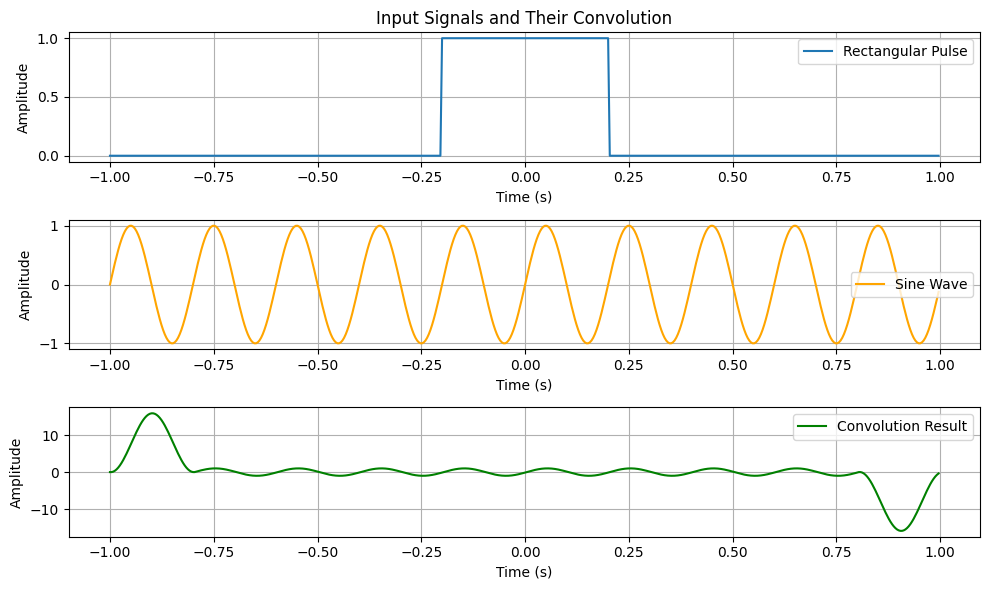

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Create a sample rectangular pulse signal
t = np.linspace(-1, 1, 500, endpoint=False)
rect_pulse = np.where(np.abs(t) < 0.2, 1, 0)

# Create a sine wave signal
sine_wave = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave

# Perform convolution of the signals
conv_result = convolve(rect_pulse, sine_wave, mode='same')

# Plot the signals and the convolved result
plt.figure(figsize=(10, 6))

# Rectangular pulse
plt.subplot(3, 1, 1)
plt.plot(t, rect_pulse, label="Rectangular Pulse")
plt.legend()
plt.grid()
plt.title("Input Signals and Their Convolution")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Sine wave
plt.subplot(3, 1, 2)
plt.plot(t, sine_wave, label="Sine Wave", color='orange')
plt.legend()
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Convolved result
plt.subplot(3, 1, 3)
plt.plot(t, conv_result, label="Convolution Result", color='green')
plt.legend()
plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

## correlate


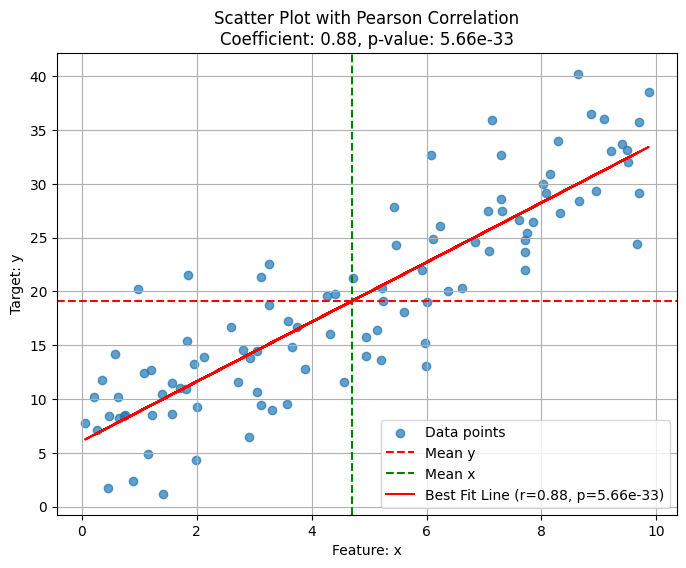

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress


def noisy_y(x):
    return 3 * x + 5 + np.random.normal(0, 5, size=x.shape)  # Linear transformation with noise

def clean_y(x):
    return 3 * x + 5

# Generate synthetic data
np.random.seed(42)
x = np.random.rand(100) * 10  # Random input feature

y = noisy_y(x)
#y = clean_y(x)

# Compute Pearson correlation coefficient
corr_coef, p_value = pearsonr(x, y)

# Let's put the best-fit line on the plot because Pearson is essentially wrt that line
# 
slope, intercept, r_value, p_value_line, std_err = linregress(x, y)

# Define the best-fit line
best_fit_line = slope * x + intercept

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, label="Data points")
plt.xlabel("Feature: x")
plt.ylabel("Target: y")
plt.title(f"Scatter Plot with Pearson Correlation\nCoefficient: {corr_coef:.2f}, p-value: {p_value_line:.2e}")

plt.axhline(np.mean(y), color='red', linestyle='--', label="Mean y")
plt.axvline(np.mean(x), color='green', linestyle='--', label="Mean x")

# Plot the best-fit line
plt.plot(x, best_fit_line, color='red', label=f'Best Fit Line (r={r_value:.2f}, p={p_value:.2e})')

plt.legend()
plt.grid(True)

plt.show()

## `spectral` usage

**Generate Example Dataset**

Here we simulate time-series data as environmental sounds:
- Class 1: Mix of sine waves (machine hums).
- Class 2: White noise (traffic noise).
- Class 3: Chirp signals (bird sounds).


In [14]:
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt

# Sampling parameters
fs = 500  # Sampling frequency (Hz)
T = 1.0  # Duration in seconds
t = np.linspace(0, T, int(fs * T), endpoint=False)  # Time vector


# Class 1: Sine wave (e.g., machine hum)
def generate_sine_wave(freq, amp, t):
    return amp * np.sin(2 * np.pi * freq * t)


# Class 2: White noise (e.g., traffic noise)
def generate_noise(t):
    return np.random.normal(0, 1, len(t))


# Class 3: Chirp signal (e.g., bird song)
def generate_chirp(f0, f1, t):
    return chirp(t, f0=f0, f1=f1, t1=T, method='linear')


# Simulate 3 classes of signals
n_samples_per_class = 50
labels = []
signals = []

for _ in range(n_samples_per_class):
    # Class 1: Sine waves with random frequency and amplitude
    signals.append(generate_sine_wave(freq=np.random.uniform(20, 50), amp=np.random.uniform(0.5, 1.0), t=t))
    labels.append(0)

    # Class 2: Random white noise
    signals.append(generate_noise(t))
    labels.append(1)

    # Class 3: Chirps with random start/end frequencies
    signals.append(generate_chirp(f0=np.random.uniform(20, 50), f1=np.random.uniform(50, 100), t=t))
    labels.append(2)

signals = np.array(signals)
labels = np.array(labels)


**Extract Features Using `scipy.signal.spectrogram`**

We'll compute a spectrogram for each signal and flatten the frequency bins into feature vectors for machine learning.

In [15]:
from scipy.signal import spectrogram


def extract_spectrogram_features(signal, fs, nfft=128, noverlap=64):
    """
    Compute spectrogram and flatten into feature vector.
    Args:
        signal (np.ndarray): Time-series data.
        fs (float): Sampling frequency.
        nfft (int): Number of FFT points.
        noverlap (int): Overlapping window size.
    Returns:
        np.ndarray: Flattened spectrogram (frequency bins × time bins).
    """
    # Compute the spectrogram
    f, t, Sxx = spectrogram(signal, fs=fs, nperseg=nfft, noverlap=noverlap)

    # Flatten the spectrogram to use as ML features
    return Sxx.flatten()


# Extract features for all signals
features = np.array([extract_spectrogram_features(signal, fs) for signal in signals])

print("Feature Shape:", features.shape)  # Expect [n_samples, n_features]


Feature Shape: (150, 390)


**Train a Machine Learning Classifier**

This step involves feeding the spectrogram features into a simple machine learning model like logistic regression.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a logistic regression model
classifier = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# Test the classifier
y_pred = classifier.predict(X_test)

# Print results
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       1.00      1.00      1.00        10
           2       0.73      0.89      0.80         9

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30

Accuracy: 0.87


**Visualize the Spectrogram**

(Optional) Plot one spectrogram to understand how the frequency content differs across classes.

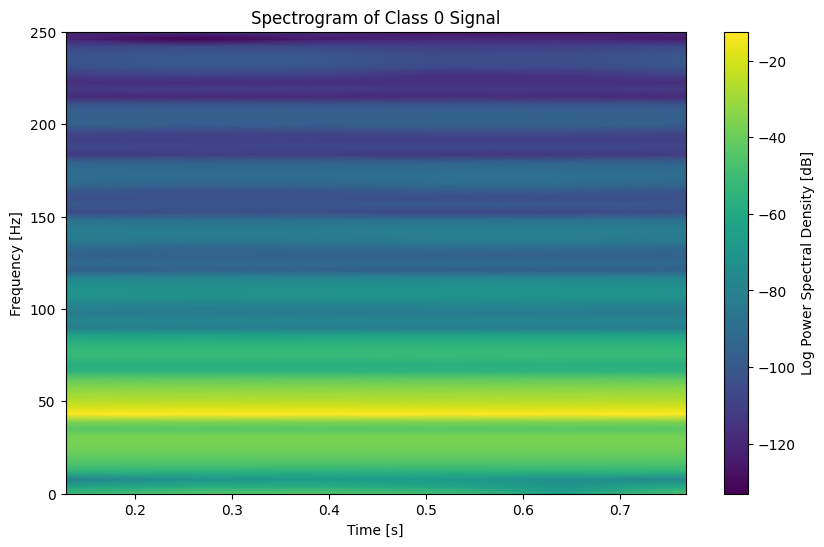

In [21]:
# Plot spectrogram for a single example
example_idx = 0  # Change this to explore different examples
example_signal = signals[example_idx]
f, t, Sxx = spectrogram(example_signal, fs=fs, nperseg=128, noverlap=64)

plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading="gouraud")
plt.title(f"Spectrogram of Class {labels[example_idx]} Signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label="Log Power Spectral Density [dB]")
plt.show()



## B-splines wth `cspline__`

Example showing how to use B-splines in scipy.signal to do
interpolation. The input points must be equally spaced to use these
routine.

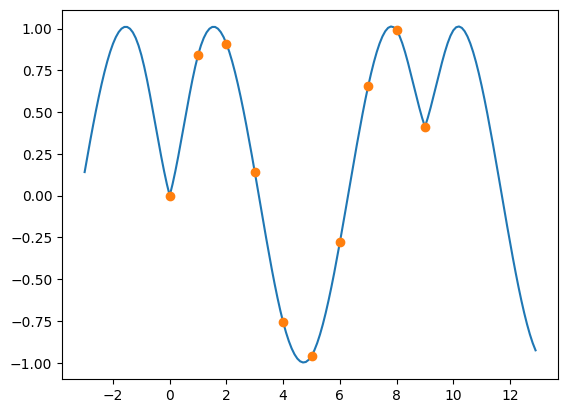

In [13]:
from matplotlib.pyplot import plot, show
from numpy import r_, sin
from scipy.signal import cspline1d, cspline1d_eval

x = r_[0:10]
dx = x[1]-x[0]
newx = r_[-3:13:0.1]  # notice outside the original domain
y = sin(x)
cj = cspline1d(y)
newy = cspline1d_eval(cj, newx, dx=dx,x0=x[0])
plot(newx, newy, x, y, 'o')
show()
